In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt

2024-01-25 03:04:45.772762: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-25 03:04:45.817709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 03:04:45.817784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 03:04:45.818905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 03:04:45.830063: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = tf.keras.models.load_model('outputs/model')

2024-01-25 03:04:47.236451: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


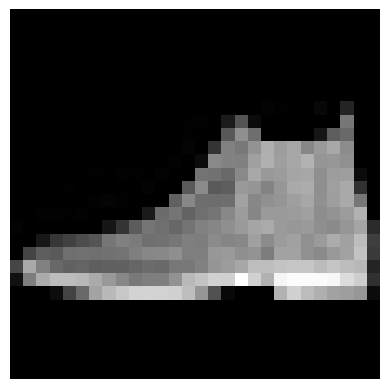

In [3]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

In [4]:
labels_map = {
  0: 'T-Shirt',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle Boot',
}

In [5]:
predicted_vector = model.predict(X)
predicted_index = np.argmax(predicted_vector)
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

1/1 [==============================] - 0s 111ms/step
Predicted class: Ankle Boot


In [6]:
probs = tf.nn.softmax(predicted_vector.reshape((-1,)))
for i,p in enumerate(probs):
    print(f'{labels_map[i]} -> {p:.3f}')

T-Shirt -> 0.000
Trouser -> 0.000
Pullover -> 0.000
Dress -> 0.000
Coat -> 0.000
Sandal -> 0.021
Shirt -> 0.000
Sneaker -> 0.081
Bag -> 0.006
Ankle Boot -> 0.892
